In [1]:
import torch

from utils import Draw
from utils.DataLoader import Loader
from utils.OpeModel import OpeModel
from torchsummary import summary

from models.SpecNet import SpecCNN

In [2]:
classCount = 10
loader = Loader(classCount=classCount)
classes, train_loader, test_loader = loader.loader()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
model = SpecCNN(classCount=classCount)
model_ini = model
opemodel = OpeModel(model, device, 0.001, train_loader, test_loader)
opemodel.load_state('full', 98.56, 120, 10)
# opemodel.eval_acc()

In [4]:
# opemodel.train_strategy(100)
# opemodel.modify_lr(0.00001)
# opemodel.train_strategy(20)
# opemodel.save_state('full', 120, 10)

In [5]:
model, acc, loss = opemodel.get_state()
model_fin = model
# Draw.plot_cfm(model, device, test_loader, classes)
# Draw.plot_loss_acc(acc, loss)

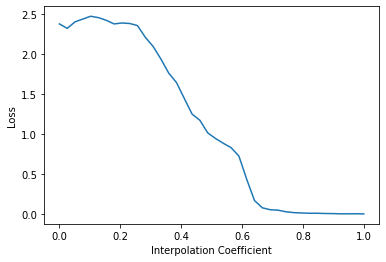

In [6]:
land = Draw.Landscape(1, model_ini, model_fin, train_loader)
land.draw()